In [2]:
# 기본
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게...
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 분류 알고리즘
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 회귀 알고리즘
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

# 분류용 평가 함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용 평가 함수
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

OSError: dlopen(/Users/hyojinlee/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib
  Referenced from: /Users/hyojinlee/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

### 데이터를 불러온다.

In [2]:
df1 = pd.read_csv('data/boston.csv')
df1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0,0.5380,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.4690,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.4580,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,0.05023,35.0,6.06,0,0.4379,5.706,28.4,6.6407,1,304,16.9,394.02,12.43,17.1
332,0.03466,35.0,6.06,0,0.4379,6.031,23.3,6.6407,1,304,16.9,362.25,7.83,19.4
333,0.05083,0.0,5.19,0,0.5150,6.316,38.1,6.4584,5,224,20.2,389.71,5.68,22.2
334,0.03738,0.0,5.19,0,0.5150,6.310,38.5,6.4584,5,224,20.2,389.40,6.75,20.7


### 데이터 전처리

In [3]:
# 입력과 결과로 나눈다.
X = df1.drop('target', axis=1)
y = df1['target']

In [4]:
# 표준화
scaler1 = StandardScaler()
scaler1.fit(X)
X = scaler1.transform(X)

In [5]:
print(X)
print(y)

[[-0.63326028  0.12485095 -1.03628034 ... -1.07088823  0.41031054
  -0.92655695]
 [-0.60097475 -0.58885279 -0.25831126 ...  0.06047401  0.41031054
  -0.22972861]
 [-0.60100552 -0.58885279 -0.25831126 ...  0.06047401  0.31149419
  -1.08568842]
 ...
 [-0.56479774 -0.58885279 -0.56557636 ...  1.14658176  0.23574309
  -0.80930218]
 [-0.5854857  -0.58885279 -0.56557636 ...  1.14658176  0.22821654
  -0.63006989]
 [-0.58205565 -0.58885279 -0.56557636 ...  1.14658176  0.41031054
  -0.41901131]]
0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
331    17.1
332    19.4
333    22.2
334    20.7
335    21.1
Name: target, Length: 336, dtype: float64


### 기본 모델을 통한 교차 검증

In [6]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [7]:
# AdaBoost
model1 = AdaBoostRegressor(random_state=1)
r1 = cross_val_score(model1, X, y, scoring='r2', cv=kfold)
print(f'평균 성능 수치 : {r1.mean()}')

평균 성능 수치 : 0.8705312723221196


In [8]:
# Gradient
model2 = GradientBoostingRegressor(random_state=1)
r2 = cross_val_score(model2, X, y, scoring='r2', cv=kfold)
print(f'평균 성능 수치 : {r2.mean()}')

평균 성능 수치 : 0.9122472593217571


In [9]:
# LGBM
model3 = LGBMRegressor(random_state=1)
r3 = cross_val_score(model3, X, y, scoring='r2', cv=kfold)
print(f'평균 성능 수치 : {r3.mean()}')

평균 성능 수치 : 0.9097644022113087


In [11]:
# XGBoost
model4 = XGBRegressor(random_state=1, silent=True, verbosity=0)
r4 = cross_val_score(model4, X, y, scoring='r2', cv=kfold)
print(f'평균 성능 수치 : {r4.mean()}')

평균 성능 수치 : 0.890739990337275


### 하이퍼 파라미터 튜닝

In [12]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model1 = AdaBoostRegressor(random_state=1)
grid1 = GridSearchCV(tmp_model1, param_grid=params, scoring='r2', cv=kfold)
grid1.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid1.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.8718462525225587


In [13]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model2 = GradientBoostingRegressor(random_state=1)
grid2 = GridSearchCV(tmp_model2, param_grid=params, scoring='r2', cv=kfold)
grid2.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid2.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.9137898462079497


In [14]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000]
}

tmp_model3 = LGBMRegressor(random_state=1)
grid3 = GridSearchCV(tmp_model3, param_grid=params, scoring='r2', cv=kfold)
grid3.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid3.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.1, 'n_estimators': 100}
최적의 모델 평균 성능 : 0.9097644022113087


In [15]:
# learning rate : 학습률. 보정 할 때 어느 정도로 보정을 할 것인지를 설정한다.
# 값이 너무 크면 보정 정도가 크므로 세밀하지 못하지만 속도가 빠르고, 값이 작으면
# 세밀하게 보정하지만 속도가 느리다.
# n_estimators : 내부적으로 사용하는 트리의 개수
# booster : 내부에서 사용할 알고리즘(gbtree - 트리, gblinear - 선형)
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0, 1, 10, 100, 1000, 10000],
    'booster' : ['gbtree', 'gblinear']
}

tmp_model4 = XGBRegressor(random_state=1, silent=True, verbosity=0)
grid4 = GridSearchCV(tmp_model4, param_grid=params, scoring='r2', cv=kfold)
grid4.fit(X, y)
print(f'최적의 하이퍼 파라미터 : {grid4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid4.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.1, 'n_estimators': 150}
최적의 모델 평균 성능 : 0.9032621023019196


In [16]:
print(f'AdaBoost Basic : {r1.mean()}')
print(f'GradientBoost Basic : {r2.mean()}')
print(f'LGBM Basic : {r3.mean()}')
print(f'XGBoost Basic : {r4.mean()}')
print(f'AdaBoost Tuning : {grid1.best_score_}')
print(f'GradientBoost Tuning : {grid2.best_score_}')
print(f'LGBM Tuning : {grid3.best_score_}')
print(f'XGBoost Tuning : {grid4.best_score_}')

AdaBoost Basic : 0.8705312723221196
GradientBoost Basic : 0.9122472593217571
LGBM Basic : 0.9097644022113087
XGBoost Basic : 0.890739990337275
AdaBoost Tuning : 0.8718462525225587
GradientBoost Tuning : 0.9137898462079497
LGBM Tuning : 0.9097644022113087
XGBoost Tuning : 0.9032621023019196


### 최종평가를 수행한다.

In [17]:
best_model1 = grid1.best_estimator_
best_model2 = grid2.best_estimator_
best_model3 = grid3.best_estimator_
best_model4 = grid4.best_estimator_

In [18]:
# 학습용과 검증용으로 데이터를 나눈다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [19]:
# 학습용 데이터로 학습을 시킨다.
best_model1.fit(X_train, y_train)
best_model2.fit(X_train, y_train)
best_model3.fit(X_train, y_train)
best_model4.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

In [20]:
# 학습용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_train)
y_pred2 = best_model2.predict(X_train)
y_pred3 = best_model3.predict(X_train)
y_pred4 = best_model4.predict(X_train)

In [21]:
r1 = r2_score(y_train, y_pred1)
r2 = mean_squared_error(y_train, y_pred1)

print('AdaBoost 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

AdaBoost 학습 데이터 평가
r2 : 0.9388598392150137
mean_squared_error : 5.088854661700525


In [22]:
r1 = r2_score(y_train, y_pred2)
r2 = mean_squared_error(y_train, y_pred2)

print('GradientBoosting 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

GradientBoosting 학습 데이터 평가
r2 : 0.995479324366414
mean_squared_error : 0.37626759525400827


In [23]:
r1 = r2_score(y_train, y_pred3)
r2 = mean_squared_error(y_train, y_pred3)

print('LGBM 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

LGBM 학습 데이터 평가
r2 : 0.9840026930148367
mean_squared_error : 1.3314974835017643


In [24]:
r1 = r2_score(y_train, y_pred4)
r2 = mean_squared_error(y_train, y_pred4)

print('XGBoost 학습 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

XGBoost 학습 데이터 평가
r2 : 0.9999529287354642
mean_squared_error : 0.0039178638212595445


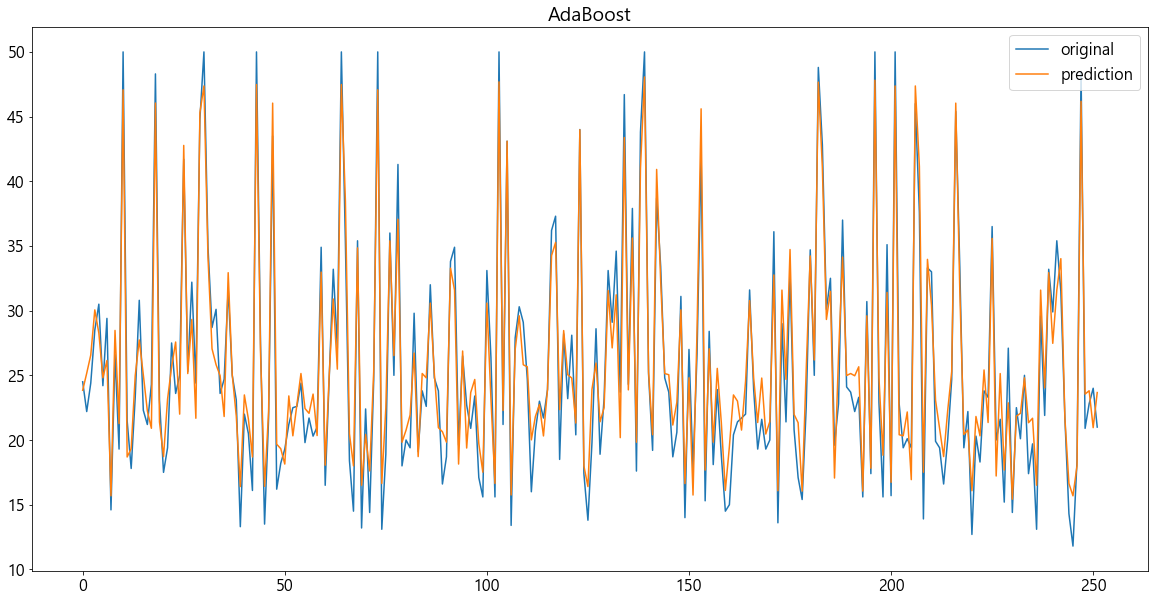

In [25]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('AdaBoost')
plt.show()

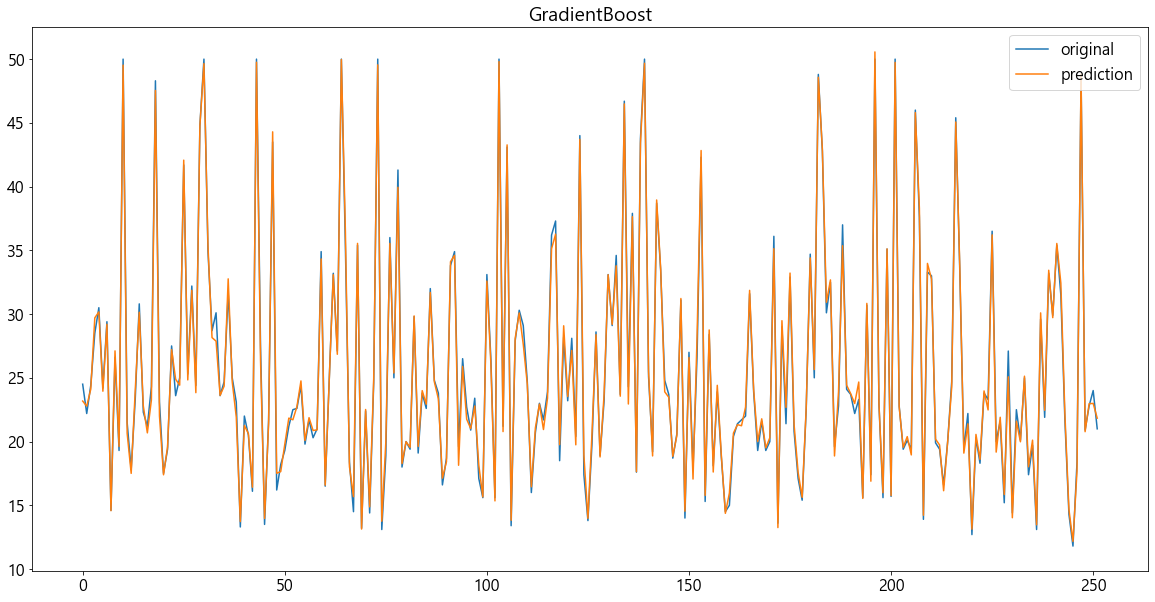

In [26]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('GradientBoost')
plt.show()

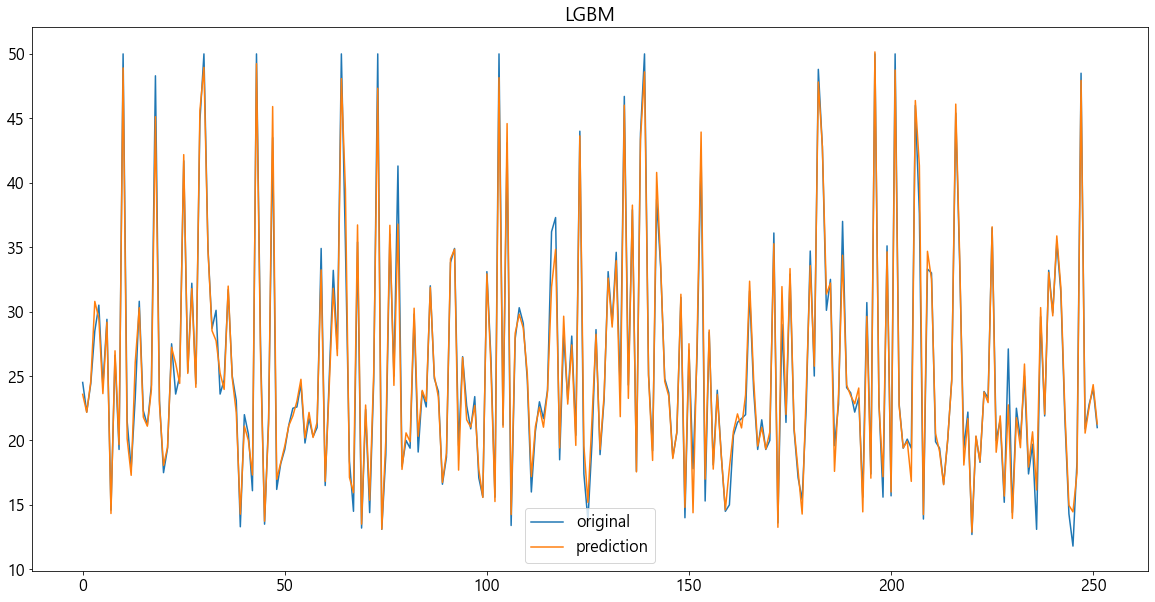

In [27]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('LGBM')
plt.show()

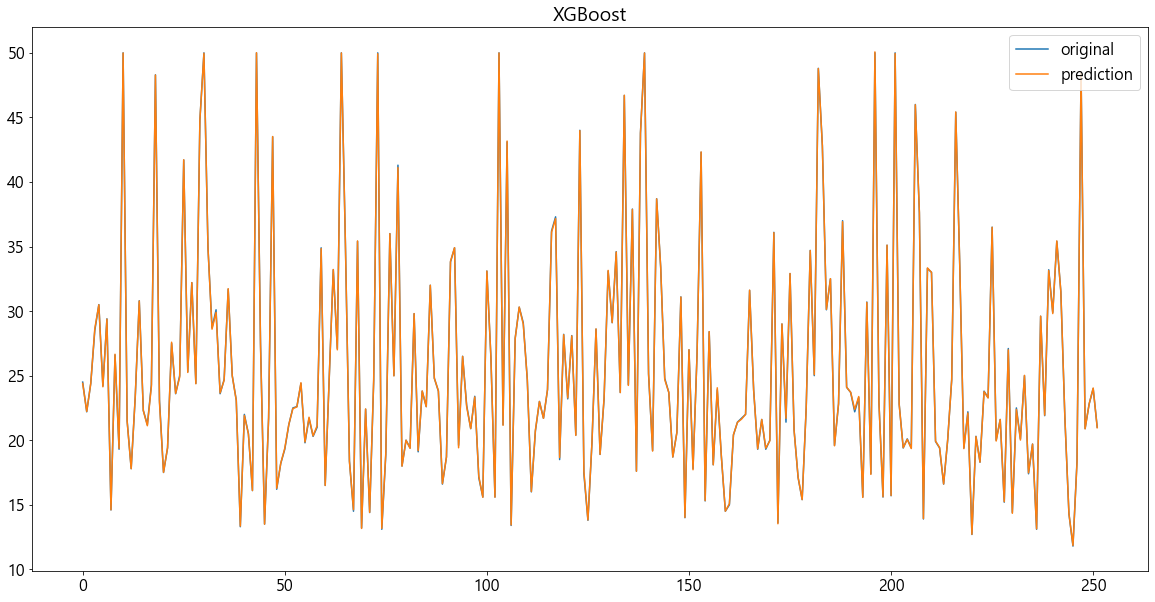

In [28]:
plt.plot(y_train.values, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('XGBoost')
plt.show()

In [29]:
# 검증용 데이터를 통해 예측 결과를 가져온다.
y_pred1 = best_model1.predict(X_test)
y_pred2 = best_model2.predict(X_test)
y_pred3 = best_model3.predict(X_test)
y_pred4 = best_model4.predict(X_test)

In [30]:
r1 = r2_score(y_test, y_pred1)
r2 = mean_squared_error(y_test, y_pred1)

print('AdaBoost 검증 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

AdaBoost 검증 데이터 평가
r2 : 0.825152237775798
mean_squared_error : 7.138029797741869


In [31]:
r1 = r2_score(y_test, y_pred2)
r2 = mean_squared_error(y_test, y_pred2)

print('GradientBoost 검증 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

GradientBoost 검증 데이터 평가
r2 : 0.9092713566046241
mean_squared_error : 3.7039293601851235


In [32]:
r1 = r2_score(y_test, y_pred3)
r2 = mean_squared_error(y_test, y_pred3)

print('LGBM 검증 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

LGBM 검증 데이터 평가
r2 : 0.8626226570157134
mean_squared_error : 5.608327812048542


In [33]:
r1 = r2_score(y_test, y_pred4)
r2 = mean_squared_error(y_test, y_pred4)

print('XGBoost 검증 데이터 평가')
print(f'r2 : {r1.mean()}')
print(f'mean_squared_error : {r2.mean()}')

XGBoost 검증 데이터 평가
r2 : 0.9162114533724942
mean_squared_error : 3.4206050733993023


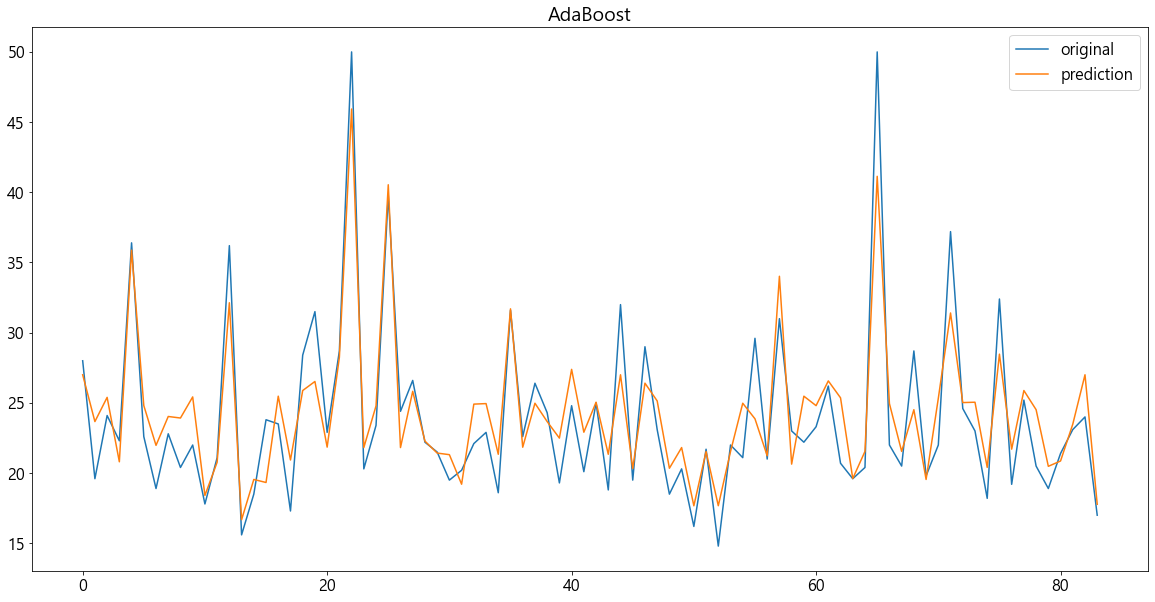

In [34]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred1, label='prediction')
plt.legend()
plt.title('AdaBoost')
plt.show()

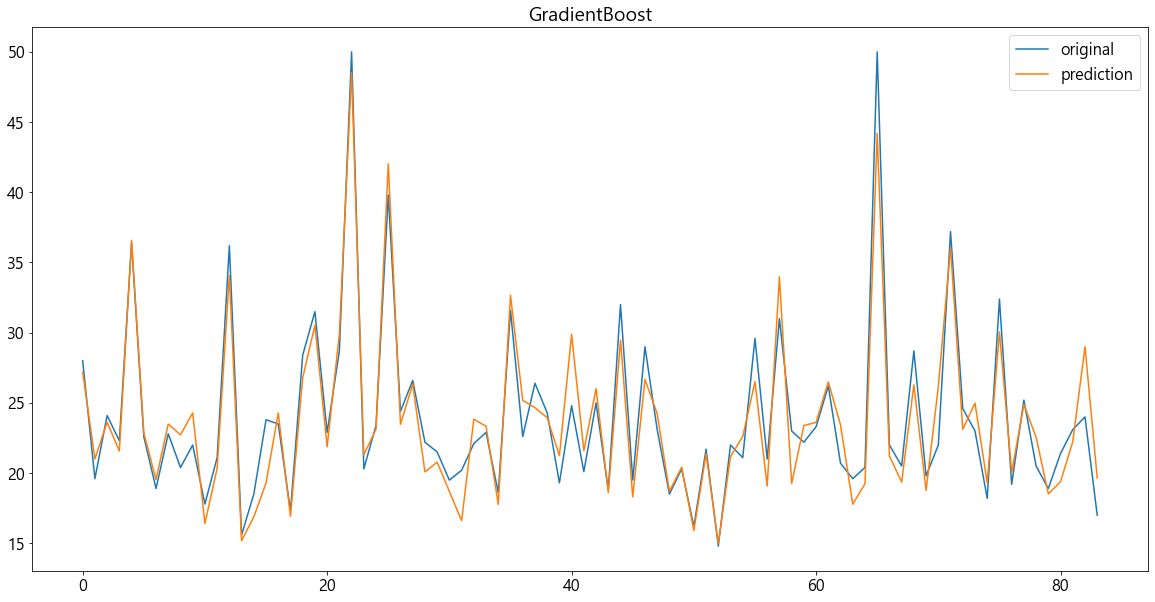

In [35]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred2, label='prediction')
plt.legend()
plt.title('GradientBoost')
plt.show()

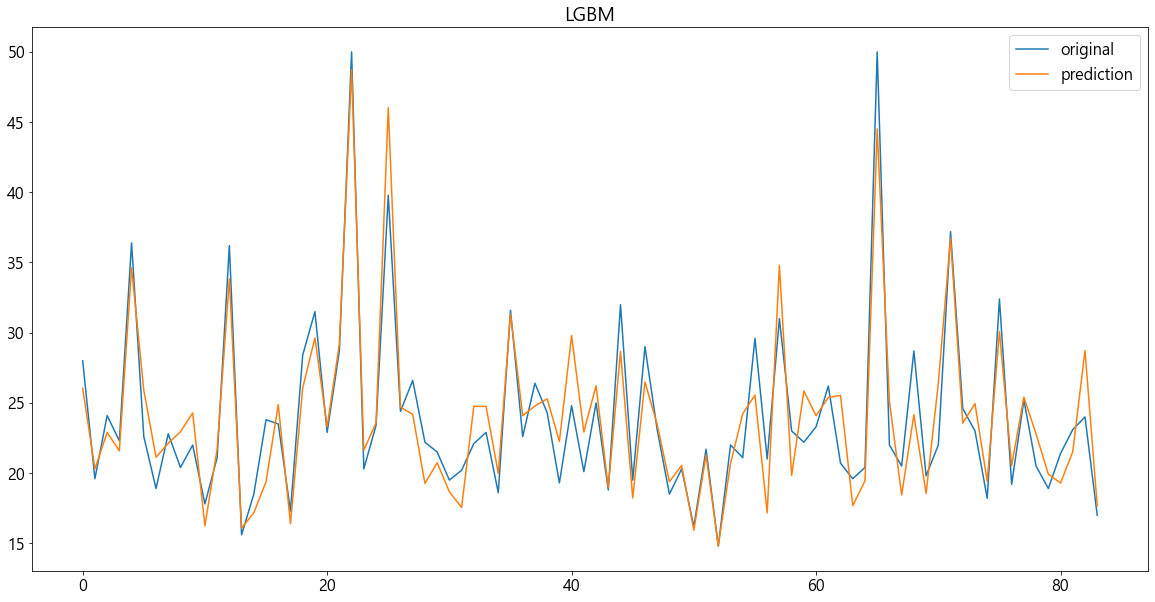

In [36]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred3, label='prediction')
plt.legend()
plt.title('LGBM')
plt.show()

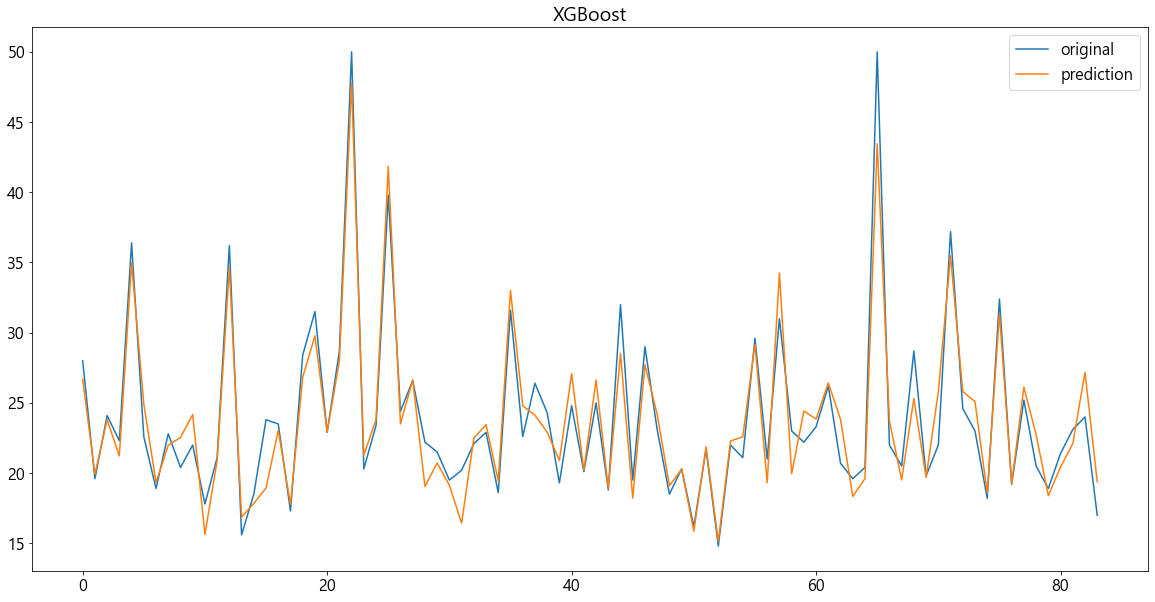

In [37]:
plt.plot(y_test.values, label='original')
plt.plot(y_pred4, label='prediction')
plt.legend()
plt.title('XGBoost')
plt.show()

### 전체 데이터를 학습시킨다

In [38]:
best_model1.fit(X, y)
best_model2.fit(X, y)
best_model3.fit(X, y)
best_model4.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=150, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=1, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, silent=True, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=0)

### 데이터를 예측한다.

In [39]:
# 예측할 데이터를 불러온다.
df2 = pd.read_csv('data/boston_new.csv')
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.03427,0,5.19,0,0.515,5.869,46.3,5.2311,5,224,20.2,396.90,9.80
1,0.03041,0,5.19,0,0.515,5.895,59.6,5.6150,5,224,20.2,394.81,10.56
2,0.03306,0,5.19,0,0.515,6.059,37.3,4.8122,5,224,20.2,396.14,8.51
3,0.05497,0,5.19,0,0.515,5.985,45.4,4.8122,5,224,20.2,396.90,9.74
4,0.06151,0,5.19,0,0.515,5.968,58.5,4.8122,5,224,20.2,396.90,9.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
166,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
167,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
168,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [40]:
# 전처리
X = scaler1.transform(df2)
X

array([[-0.59026931, -0.58885279, -0.56557636, ...,  1.14658176,
         0.41031054, -0.11917412],
       [-0.59620652, -0.58885279, -0.56557636, ...,  1.14658176,
         0.35956701,  0.00813106],
       [-0.59213046, -0.58885279, -0.56557636, ...,  1.14658176,
         0.39185835, -0.3352579 ],
       ...,
       [-0.54952402, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.81600245],
       [-0.47441672, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.3265473 , -0.67529673],
       [-0.57005817, -0.58885279,  0.5360017 , ...,  1.50861767,
         0.41031054, -0.4407872 ]])

In [41]:
# 예측한다.
y_pred1 = best_model1.predict(X)
y_pred2 = best_model2.predict(X)
y_pred3 = best_model3.predict(X)
y_pred4 = best_model4.predict(X)

In [42]:
# 저장한다.
df2['target'] = y_pred1
df2.to_csv('data/boston_AdaBoost.csv')

df2['target'] = y_pred2
df2.to_csv('data/boston_GradientBoost.csv')

df2['target'] = y_pred3
df2.to_csv('data/boston_LGBM.csv')

df2['target'] = y_pred4
df2.to_csv('data/boston_XGBoost.csv')